In [1]:
!free -m
# !df -h
!nvidia-smi

              total        used        free      shared  buff/cache   available
Mem:           7805        5361        1027         292        1416        1855
Swap:          2047        1468         579
Fri Jan 29 20:09:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 455.45.01    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 105...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   51C    P3    N/A /  N/A |    972MiB /  4040MiB |     12%      Default |
|                               |           

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Input, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset

In [26]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
num_classes = 10

In [27]:
# Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


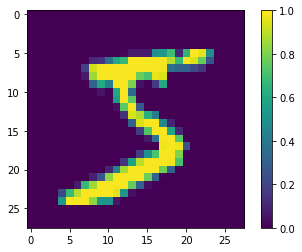

In [28]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Defining MNIST classification model

In [36]:
input_shape = (28,28,1)
model = tf.keras.Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1

# Train MNIST Classifier

In [37]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 14s 33ms/step - loss: 0.7582 - accuracy: 0.7657 - val_loss: 0.0786 - val_accuracy: 0.9793
Epoch 2/15
422/422 [==============================] - 14s 33ms/step - loss: 0.1213 - accuracy: 0.9622 - val_loss: 0.0558 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0880 - accuracy: 0.9728 - val_loss: 0.0486 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0724 - accuracy: 0.9784 - val_loss: 0.0422 - val_accuracy: 0.9868
Epoch 5/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0639 - accuracy: 0.9814 - val_loss: 0.0444 - val_accuracy: 0.9867
Epoch 6/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0351 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.0338 - val_accuracy:

# Test the classifier

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.021527839824557304
Test accuracy: 0.9923999905586243


### The Performace on Test and Validation dataset shows the model had learned from the MNIST representations

# Generating new dataset by permuting the present MNIST dataset

In [42]:
def permute_mnist(mnist, seed):
    """ Given the training set, permute pixels of each img the same way. """

    np.random.seed(seed)
    print("starting permutation...")
    h = w = 28
    perm_inds = list(range(h*w))
    np.random.shuffle(perm_inds)
    # print(perm_inds)
    perm_mnist = []
    for set in mnist:
        num_img = set.shape[0]
        flat_set = set.reshape(num_img, w * h)
        perm_mnist.append(flat_set[:, perm_inds].reshape(num_img, w, h, 1))
    print("done.")
    return perm_mnist

In [43]:
x_train2, x_test2 = permute_mnist([x_train, x_test], 0)

starting permutation...
done.


In [47]:
x_test2.shape

(10000, 28, 28, 1)

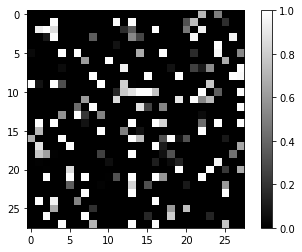

In [49]:
plt.figure()
plt.imshow(x_train2[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

# Testing Pre-trained MNIST model using the Permuted dataset

In [50]:
score = model.evaluate(x_test2, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.921799898147583
Test accuracy: 0.13920000195503235


### When used the Permuted Test dataset, the performance of the model is poor. This Sort of performance is expected

# Training MNIST classifier using the Permuted Train dataset

In [51]:
model.fit(x_train2, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 14s 34ms/step - loss: 0.7660 - accuracy: 0.7485 - val_loss: 0.2889 - val_accuracy: 0.9175
Epoch 2/15
422/422 [==============================] - 14s 34ms/step - loss: 0.4301 - accuracy: 0.8659 - val_loss: 0.2306 - val_accuracy: 0.9358
Epoch 3/15
422/422 [==============================] - 14s 33ms/step - loss: 0.3616 - accuracy: 0.8859 - val_loss: 0.1903 - val_accuracy: 0.9460
Epoch 4/15
422/422 [==============================] - 14s 34ms/step - loss: 0.3230 - accuracy: 0.8992 - val_loss: 0.1754 - val_accuracy: 0.9500
Epoch 5/15
422/422 [==============================] - 14s 34ms/step - loss: 0.2940 - accuracy: 0.9064 - val_loss: 0.1565 - val_accuracy: 0.9560
Epoch 6/15
422/422 [==============================] - 14s 34ms/step - loss: 0.2709 - accuracy: 0.9144 - val_loss: 0.1503 - val_accuracy: 0.9595
Epoch 7/15
422/422 [==============================] - 15s 35ms/step - loss: 0.2550 - accuracy: 0.9189 - val_loss: 0.1493 - val_accuracy:

# Testing the Trained model on Permuted Test dataset

In [52]:
score = model.evaluate(x_test2, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.13871419429779053
Test accuracy: 0.9569000005722046


### The Performace on Permuted Test and Validation dataset shows the model had learned from the Permuted MNIST representations

# Testing the Trained model on MNIST Test dataset 

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 5.136825084686279
Test accuracy: 0.3037000000476837


### The Performance of the model that is trained on MNIST and Permuted-MNIST data shows that the model forgot the representations learnt on MNIST data resulting in the reduction of test data accuracy.

# This issue is called Catastrophic Forgetting

## This effect of Catastrophic Forgetting is alleviated using three methods

### 1) Naive
### 2) Rehearsal
### 3) Elastic Weight Consolidation (EWC)

%%latex
\begin{itemize}
\item Naive approach
\end{itemize}


%%latex
$$\begin{itemize}
\item Naive approach
\end{itemize}$$